In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

## Dataset: The dataset contains 18 variables (9 booleans, 5 strings and 4 decimals). In machine learning projects, "HeartDisease" can be used as the explonatory variable.

In [2]:
df = pd.read_csv(r"C:\Users\rajku\Documents\OneDrive\Desktop\MSc Data Analytics\Trimester-4\Machine Learning\Labs\Lab3\heart_2020.csv",  encoding = "latin")

In [3]:
df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


In [4]:
df.shape

(319795, 18)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  object 
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  object 
 3   AlcoholDrinking   319795 non-null  object 
 4   Stroke            319795 non-null  object 
 5   PhysicalHealth    319795 non-null  float64
 6   MentalHealth      319795 non-null  float64
 7   DiffWalking       319795 non-null  object 
 8   Sex               319795 non-null  object 
 9   AgeCategory       319795 non-null  object 
 10  Race              319795 non-null  object 
 11  Diabetic          319795 non-null  object 
 12  PhysicalActivity  319795 non-null  object 
 13  GenHealth         319795 non-null  object 
 14  SleepTime         319795 non-null  float64
 15  Asthma            319795 non-null  object 
 16  KidneyDisease     31

In [6]:
df.isnull().sum()

HeartDisease        0
BMI                 0
Smoking             0
AlcoholDrinking     0
Stroke              0
PhysicalHealth      0
MentalHealth        0
DiffWalking         0
Sex                 0
AgeCategory         0
Race                0
Diabetic            0
PhysicalActivity    0
GenHealth           0
SleepTime           0
Asthma              0
KidneyDisease       0
SkinCancer          0
dtype: int64

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
BMI,319795.0,28.325399,6.356100,12.02,24.03,27.34,31.42,94.85
PhysicalHealth,319795.0,3.371710,7.950850,0.00,0.00,0.00,2.00,30.00
MentalHealth,319795.0,3.898366,7.955235,0.00,0.00,0.00,3.00,30.00
SleepTime,319795.0,7.097075,1.436007,1.00,6.00,7.00,8.00,24.00


array([[<AxesSubplot:title={'center':'BMI'}>,
        <AxesSubplot:title={'center':'PhysicalHealth'}>],
       [<AxesSubplot:title={'center':'MentalHealth'}>,
        <AxesSubplot:title={'center':'SleepTime'}>]], dtype=object)

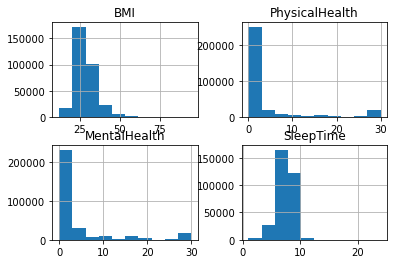

In [8]:
df.hist()

# Here Physical health and mental health are skewed dataset hence we apply log transform to normalise them.


In [9]:
df['PhysicalHealth']=df['PhysicalHealth'].apply(np.log1p)

In [10]:
df['MentalHealth']=df['MentalHealth'].apply(np.log1p)

C:\Users\rajku\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='PhysicalHealth', ylabel='Density'>

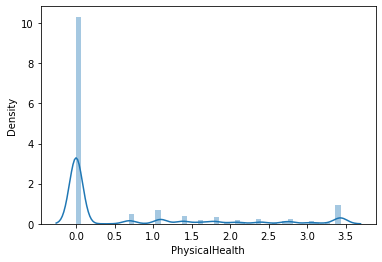

In [11]:
sns.distplot(df["PhysicalHealth"])

C:\Users\rajku\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='MentalHealth', ylabel='Density'>

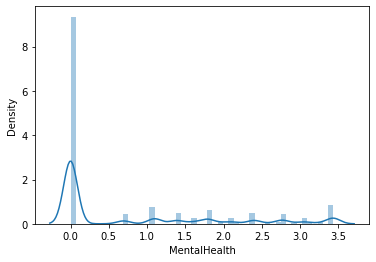

In [12]:
sns.distplot(df["MentalHealth"])

In [13]:
df.Diabetic.value_counts()

No                         269653
Yes                         40802
No, borderline diabetes      6781
Yes (during pregnancy)       2559
Name: Diabetic, dtype: int64

In [14]:
# Since we want to diagnose as Yes for heart-disease, even if there is a slightest chance, let us consider borderline diabetic and pregnancy diabetic as No.
df['Diabetic'] = df.Diabetic.apply(lambda x: 'No' if x == 'No, borderline diabetes' or x == 'Yes (during pregnancy)' else x)
df.Diabetic.value_counts()

No     278993
Yes     40802
Name: Diabetic, dtype: int64

In [15]:
#We have a few categorical variables with Yes/No values. Let us convert them to binary 1/0
column_yesno = ["HeartDisease", "Smoking", "AlcoholDrinking", "Stroke", "DiffWalking", "Diabetic", "PhysicalActivity", "Asthma", "KidneyDisease", "SkinCancer"]

In [16]:
df[column_yesno] = df[column_yesno].apply(lambda x: x.map({'Yes':1,'No':0}))
df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,0,16.60,1,0,0,1.386294,3.433987,0,Female,55-59,White,1,1,Very good,5.0,1,0,1
1,0,20.34,0,0,1,0.000000,0.000000,0,Female,80 or older,White,0,1,Very good,7.0,0,0,0
2,0,26.58,1,0,0,3.044522,3.433987,0,Male,65-69,White,1,1,Fair,8.0,1,0,0
3,0,24.21,0,0,0,0.000000,0.000000,0,Female,75-79,White,0,0,Good,6.0,0,0,1
4,0,23.71,0,0,0,3.367296,0.000000,1,Female,40-44,White,0,1,Very good,8.0,0,0,0


In [17]:
cat_dummies = pd.get_dummies(df['Sex'], drop_first=True)
cat_dummies.head()

,Male
0,0
1,0
2,1
3,0
4,0


In [18]:
categoricals = df.select_dtypes(include=['object'])
categoricals.head()

,Sex,AgeCategory,Race,GenHealth
0,Female,55-59,White,Very good
1,Female,80 or older,White,Very good
2,Male,65-69,White,Fair
3,Female,75-79,White,Good
4,Female,40-44,White,Very good


In [19]:
cat_dummies = pd.get_dummies(categoricals, drop_first=True)
cat_dummies.head()

,Sex_Male,AgeCategory_25-29,AgeCategory_30-34,AgeCategory_35-39,AgeCategory_40-44,AgeCategory_45-49,AgeCategory_50-54,AgeCategory_55-59,AgeCategory_60-64,AgeCategory_65-69,...,AgeCategory_80 or older,Race_Asian,Race_Black,Race_Hispanic,Race_Other,Race_White,GenHealth_Fair,GenHealth_Good,GenHealth_Poor,GenHealth_Very good
0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,1
1,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,1
2,1,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,1,1,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
4,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1


In [20]:
list(cat_dummies.columns)

['Sex_Male',
 'AgeCategory_25-29',
 'AgeCategory_30-34',
 'AgeCategory_35-39',
 'AgeCategory_40-44',
 'AgeCategory_45-49',
 'AgeCategory_50-54',
 'AgeCategory_55-59',
 'AgeCategory_60-64',
 'AgeCategory_65-69',
 'AgeCategory_70-74',
 'AgeCategory_75-79',
 'AgeCategory_80 or older',
 'Race_Asian',
 'Race_Black',
 'Race_Hispanic',
 'Race_Other',
 'Race_White',
 'GenHealth_Fair',
 'GenHealth_Good',
 'GenHealth_Poor',
 'GenHealth_Very good']

In [21]:
#To replace these values with the new encoded values
df.drop(list(categoricals.columns), axis=1, inplace=True)

In [22]:
df.shape

(319795, 14)

In [23]:
# concating df and dummies data frames.
df = pd.concat([df, cat_dummies], axis=1)
df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Diabetic,PhysicalActivity,...,AgeCategory_80 or older,Race_Asian,Race_Black,Race_Hispanic,Race_Other,Race_White,GenHealth_Fair,GenHealth_Good,GenHealth_Poor,GenHealth_Very good
0,0,16.60,1,0,0,1.386294,3.433987,0,1,1,...,0,0,0,0,0,1,0,0,0,1
1,0,20.34,0,0,1,0.000000,0.000000,0,0,1,...,1,0,0,0,0,1,0,0,0,1
2,0,26.58,1,0,0,3.044522,3.433987,0,1,1,...,0,0,0,0,0,1,1,0,0,0
3,0,24.21,0,0,0,0.000000,0.000000,0,0,0,...,0,0,0,0,0,1,0,1,0,0
4,0,23.71,0,0,0,3.367296,0.000000,1,0,1,...,0,0,0,0,0,1,0,0,0,1


In [24]:
df.corr()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Diabetic,PhysicalActivity,...,AgeCategory_80 or older,Race_Asian,Race_Black,Race_Hispanic,Race_Other,Race_White,GenHealth_Fair,GenHealth_Good,GenHealth_Poor,GenHealth_Very good
HeartDisease,1.000000,0.051803,0.107764,-0.032080,0.196835,0.164825,0.007791,0.201258,0.183072,-0.100030,...,0.143041,-0.030262,-0.010156,-0.036163,-0.003039,0.040121,0.147954,0.039033,0.174662,-0.101886
BMI,0.051803,1.000000,0.023118,-0.038816,0.019733,0.119677,0.057883,0.181678,0.203494,-0.150616,...,-0.094780,-0.078643,0.080672,0.023750,0.012535,-0.049060,0.127364,0.118047,0.062501,-0.065954
Smoking,0.107764,0.023118,1.000000,0.111768,0.061226,0.109662,0.066040,0.120074,0.058434,-0.097174,...,0.013569,-0.060308,-0.038249,-0.066873,0.016205,0.072367,0.095620,0.059651,0.086520,-0.052305
AlcoholDrinking,-0.032080,-0.038816,0.111768,1.000000,-0.019858,-0.015832,0.057780,-0.035328,-0.058208,0.017487,...,-0.045226,-0.022275,-0.025980,-0.015554,0.005455,0.033342,-0.018859,-0.007808,-0.017068,0.013005
Stroke,0.196835,0.019733,0.061226,-0.019858,1.000000,0.133060,0.034673,0.174143,0.108407,-0.079455,...,0.086099,-0.016060,0.024819,-0.025823,0.005743,0.001154,0.104983,0.013159,0.133641,-0.069395
PhysicalHealth,0.164825,0.119677,0.109662,-0.015832,0.133060,1.000000,0.291428,0.409748,0.156687,-0.217186,...,0.030127,-0.039639,0.016279,-0.008323,0.016943,-0.003743,0.326205,0.002151,0.404647,-0.195651
MentalHealth,0.007791,0.057883,0.066040,0.057780,0.034673,0.291428,1.000000,0.128178,0.007522,-0.064505,...,-0.095708,-0.022593,0.007452,0.004007,0.030570,-0.016833,0.139230,0.018162,0.159032,-0.066501
DiffWalking,0.201258,0.181678,0.120074,-0.035328,0.174143,0.409748,0.128178,1.000000,0.216605,-0.278524,...,0.156933,-0.038830,0.039615,-0.008214,0.008483,-0.015516,0.282517,0.031570,0.308767,-0.184986
Diabetic,0.183072,0.203494,0.058434,-0.058208,0.108407,0.156687,0.007522,0.216605,1.000000,-0.140571,...,0.047756,-0.014785,0.055365,0.004056,0.003906,-0.040584,0.179979,0.082208,0.140010,-0.119147
PhysicalActivity,-0.100030,-0.150616,-0.097174,0.017487,-0.079455,-0.217186,-0.064505,-0.278524,-0.140571,1.000000,...,-0.092533,0.012106,-0.043701,-0.056564,0.001808,0.064172,-0.174255,-0.072263,-0.174144,0.132472


<AxesSubplot:>

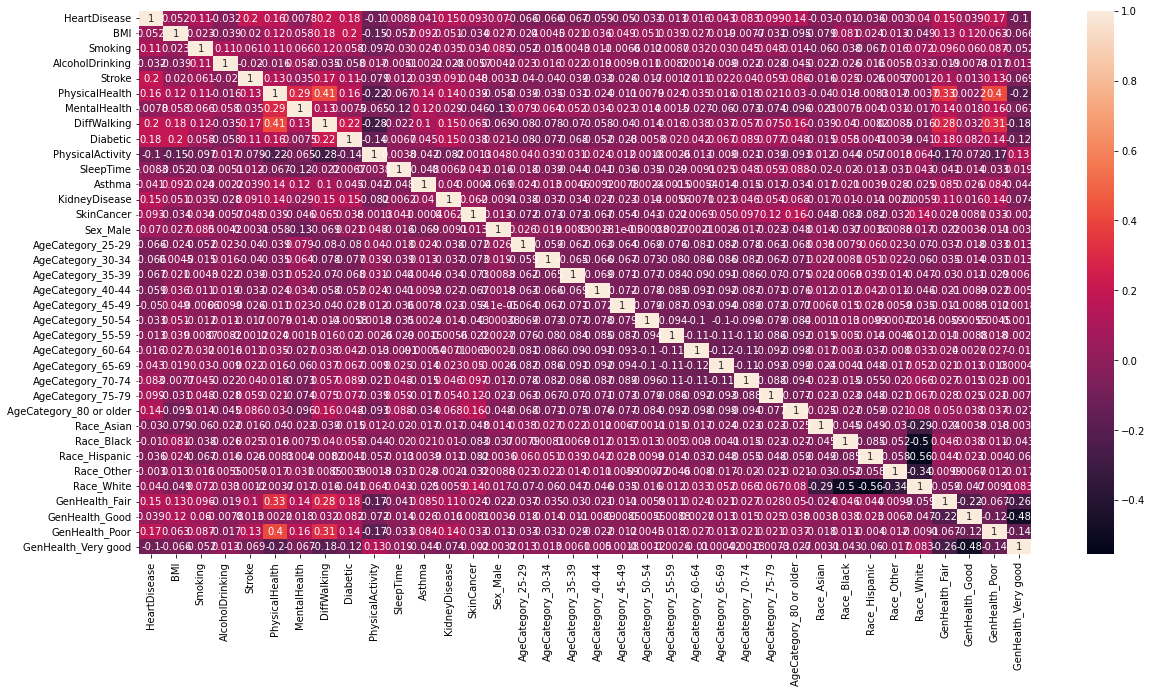

In [25]:
plt.figure(figsize = (20,10))
sns.heatmap(df.corr(),annot=True)

In [26]:
x = df.drop('HeartDisease',axis=1)
y = df['HeartDisease']

In [27]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=101)

In [28]:
model = LogisticRegression(max_iter=3000)
model.fit(x_train, y_train)
y_predicted = model.predict(x_test)

In [29]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_predicted))

              precision    recall  f1-score   support

           0       0.92      0.99      0.96     87658
           1       0.55      0.10      0.17      8281

    accuracy                           0.92     95939
   macro avg       0.73      0.55      0.56     95939
weighted avg       0.89      0.92      0.89     95939



In [30]:
from sklearn.metrics import confusion_matrix
confusion = confusion_matrix(y_test,y_predicted)
confusion

array([[86941,   717],
       [ 7421,   860]], dtype=int64)

# Conclusion
Diabetes is correlated with heart disease and Kidney disease.Less with Stroke.

Skin cancer is not correlated with other 4 diseases.


Higher the BMI, higher the chances for heart disease


